# Groundwater dataset

#### This notebook explores groundwater measurement data from the BRO groundwater depth model provided by Wageningen University (https://bodemdata.nl/downloads).

#### The data is stored in a GeoPackage (.gpkg) and includes geospatial (depth) observations of groundwater levels across the Netherlands.

In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona
import matplotlib.pyplot as plt
from rasterio.features import rasterize

Load the data

In [2]:
# # load the data
# current_dir = os.getcwd()

# # go one folder back using
# parent_dir = os.path.dirname(current_dir)

# water_path = os.path.join(parent_dir, "data", "Wageningen_water_data", "BRO_Grondwaterspiegeldieptemodel_V2024-01_1.gpkg")

In [4]:
water_path = "/Users/Administrator/Documents/University/Year 3/2b/Thesis/data/Wageningen_water_data/BRO_Grondwaterspiegeldieptemodel_V2024-01_1.gpkg"

Check which tables are available in the database

In [5]:
# tables that we have in the database
fiona.listlayers(water_path)

['water_depth_model_observation',
 'gt_codes',
 'type_observation_value',
 'note_value',
 'properties']

In [6]:
# Here we access the table of interest, specifically depth observations
depth_obs = gpd.read_file(water_path, layer="water_depth_model_observation")

In [9]:
# Total number of geometries
total_geometries = depth_obs["geometry"].count()

# Number of unique geometries
unique_geometries = depth_obs["geometry"].nunique()

print(f"Total number of geometries: {total_geometries}")
print(f"Number of unique geometries: {unique_geometries}")

Total number of geometries: 30077
Number of unique geometries: 16570


In [10]:
# Find the most frequent geometry
most_common_geometry = depth_obs["geometry"].mode().iloc[0]

# Filter the dataframe to only those rows
most_common_rows = depth_obs[depth_obs["geometry"] == most_common_geometry]

# Print results
print(f"Most frequent geometry:\n{most_common_geometry}\n")
print(f"Number of rows with this geometry: {len(most_common_rows)}")
print(most_common_rows)

/var/folders/fr/h0n611t55y51b_mts5q50l540000gn/T/ipykernel_7163/1746445009.py:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  most_common_geometry = depth_obs["geometry"].mode().iloc[0]


Most frequent geometry:
POINT (201112.5 499712.5)

Number of rows with this geometry: 2
       depth  type_observation       date  note valid_from valid_to  \
0      155.0               1.0 2002-08-01     3 2020-01-01      NaT   
12907 -150.0               1.0 2002-02-07     3 2020-01-01      NaT   

                        geometry  
0      POINT (201112.5 499712.5)  
12907  POINT (201112.5 499712.5)  


In [11]:
depth_obs.head()

,depth,type_observation,date,note,valid_from,valid_to,geometry
0,155.0,1.0,2002-08-01,3,2020-01-01,NaT,POINT (201112.5 499712.5)
1,55.0,1.0,2002-08-01,3,2020-01-01,NaT,POINT (201662.5 499137.5)
2,50.0,1.0,2002-08-01,3,2020-01-01,NaT,POINT (202612.5 498912.5)
3,151.0,1.0,2002-08-22,3,2020-01-01,NaT,POINT (181687.5 442362.5)
4,10.0,1.0,2002-08-01,3,2020-01-01,NaT,POINT (203187.5 497562.5)


Checking when the most recent measurment was taken

In [72]:
depth_obs['date'] = pd.to_datetime(depth_obs['date'])
latest_date = depth_obs['date'].max()

print("Latest date:", latest_date)

Latest date: 2023-12-28 00:00:00


In [87]:
# There are some negative values in 'depth' row which should not be the case
negative_rows = depth_obs[depth_obs['depth'] < 0]
print(len(negative_rows))

86


Display on the map all the locations where samples were taken. The color of each point indicates groundwater depth.

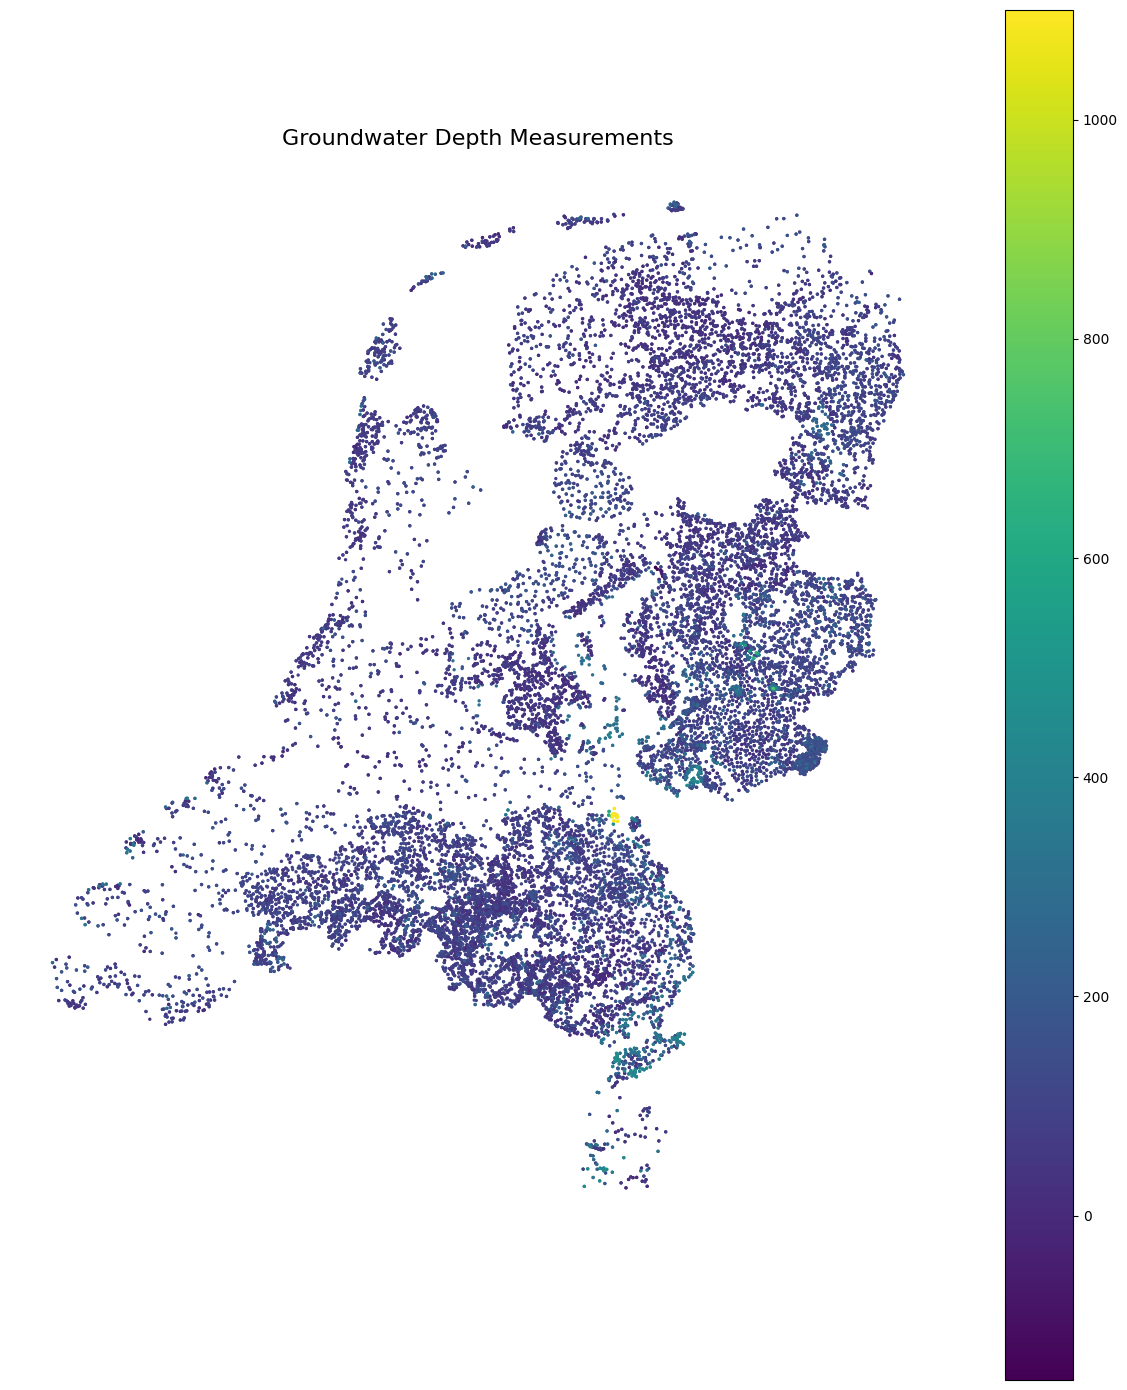

In [88]:
fig, ax = plt.subplots(figsize=(12, 14))

depth_obs.plot(
    ax=ax,
    column='depth',
    cmap='viridis',
    markersize=2,
    legend=True
)

ax.set_title("Groundwater Depth Measurements", fontsize=16)
ax.set_axis_off()

plt.tight_layout()
plt.show()